# Homework # 3: Deep Neural Networks: Part 1

# Question 1.

Implement a two-layer perceptron with the backpropagation algorithm to solve the parity problem. You must implement the forward and backpropagation paths entirely on your own, including an implementation of a perceptron and the activation function. The desired output for the parity problem is 1 if an input pattern (which contains 4-binary bits) contains an odd number of 1’s, and 0 otherwise. Follow the algorithm introduced in class. Use a network where the input has 4 binary elements, 4 hidden units for the first layer, and one output unit for the second Other implementation details are:

• Initialize all weights and biases to random numbers between -1 and 1.

• Use a logistic sigmoid as the activation function for all units.

• Randomize the order of samples for each epoch, using stochastic gradient descent to update the weights.layer. The learning procedure is stopped when an absolute error (difference) of 0.05 is reached for every input pattern.


In [2]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

Our input is going to be of 4 binary bits, and each will be a permutation of 0s and 1s. So the values are going to be: 0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111, which is the same as binary values of 0 to 15. So I have defined a function which will convert a decimal number to binary.

In [3]:
def convert_to_binary(decimal):
    binary=""
    while(decimal>=1):
        binary+=str(decimal%2)
        decimal=decimal//2
    return list(binary[::-1])

In [4]:
input_list=[]
for i in range(16):
    input_list.append(convert_to_binary(i))
input_list

[[],
 ['1'],
 ['1', '0'],
 ['1', '1'],
 ['1', '0', '0'],
 ['1', '0', '1'],
 ['1', '1', '0'],
 ['1', '1', '1'],
 ['1', '0', '0', '0'],
 ['1', '0', '0', '1'],
 ['1', '0', '1', '0'],
 ['1', '0', '1', '1'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '1'],
 ['1', '1', '1', '0'],
 ['1', '1', '1', '1']]

As it can be seen from above, we don't have 4 entries for all of them, so I will insert 0 at the left of each sublist. We then change each srting character to integer. Later we convert it to a numpy array to perform further operations. We will name it as input_list_without_bias.

In [5]:
for i in input_list:
    while(len(i)<4):
        i.insert(0,'0')
        
input_list_without_bias=deepcopy(input_list)

for i in range(len(input_list_without_bias)):
    for j in range(len(input_list_without_bias[i])):
        input_list_without_bias[i][j]=int(input_list_without_bias[i][j])
        
input_list_without_bias=np.asarray(input_list_without_bias,dtype="int32")

input_list_without_bias

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 1]], dtype=int32)

We also add the input for bias value. We define it to 1, so that we get the same value as bias after we multiply while training. So we insert 1 at the left of each sublist. We store this array as input_list. We convert this one into a numpy array similarly.

In [6]:
for i in range(len(input_list)):
    input_list[i].insert(0,1)
    for j in range(len(input_list[i])):
        input_list[i][j]=int(input_list[i][j])
        
input_list=np.asarray(input_list,dtype="int32")
input_list

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1]], dtype=int32)

The output list consists of the actual values of the parity checker. From the definition of parity check, we can conclude that it the XOR result of 4 bits. So we implement the XOR operation on each combination of 4 bits and convert it into numpy array.

In [7]:
output_list=[]
for i in range(16):
    output_list.append(input_list[i][1]^input_list[i][2]^input_list[i][3]^input_list[i][4])
output_list=np.asarray([output_list],dtype="int32")
output_list

array([[0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]], dtype=int32)

In [8]:
input_list_without_bias=input_list_without_bias.T
input_list_without_bias

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]], dtype=int32)

In [9]:
input_list=input_list.T
input_list

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]], dtype=int32)

I have also taken the transpose of both input_list and input_list_without_bias so that we can multiply it with the weight matrix.

In [10]:
def create_hidden_layer_weights_bias():
    
    random_list=[]
    for i in range(20):
        random_list.append(random.randrange(-10000000,10000000)/10000000)
    
    hidden_layer_weights_bias=[[]]
    for i in range(5):
        for j in range(4):
            hidden_layer_weights_bias[i].append(random_list[i*4+j])
        if i!=4:
            hidden_layer_weights_bias.append([])
    return np.asarray(hidden_layer_weights_bias)


def create_output_layer_weights_bias():
    
    random_list=[]
    for i in range(5):
        random_list.append(random.randrange(-10000000,10000000)/10000000)
    
    output_layer_weights_bias=[[]]
    for i in range(5):
        for j in range(1):
            output_layer_weights_bias[i].append(random_list[i])
        if i!=4:
            output_layer_weights_bias.append([])
            
    return np.asarray(output_layer_weights_bias)


The function create_hidden_layer_weights_bias() generates the weights and biases for the hidden layer of the Neural Network. It returns has 5 rows and 4 columns in a numpy array consisting of random values between -1 and 1.

The function create_output_layer_weights_bias() generates the weights and bias for the output layer of neural network. It returns a numpy column matrix of 5 rows and consists of random values between -1 and 1. 

In [11]:
hidden_layer_weights_bias=create_hidden_layer_weights_bias()
hidden_layer_weights_bias

array([[ 0.8286639, -0.0889721, -0.0192819,  0.1065405],
       [-0.2835215,  0.2968161, -0.378044 ,  0.8641992],
       [-0.2577751,  0.0286342, -0.0303594, -0.3213063],
       [-0.2660313,  0.7596311, -0.1741316, -0.8686179],
       [-0.139532 ,  0.5548972,  0.3134156,  0.7532323]])

In [12]:
output_layer_weights_bias=create_output_layer_weights_bias()
output_layer_weights_bias

array([[ 0.8112497],
       [ 0.6661672],
       [-0.1072306],
       [ 0.9241019],
       [-0.7246784]])

In [13]:
def logistic_sigmoid(x):
    
    return 1/(1 + np.exp(-x))

The logistic_sigmoid function for every x returns the value as: (1/1+e**(-x))

In [14]:
def forward_propagation(x,hidden_layer_weights_bias,output_layer_weights_bias):
    
    output = []
    output.append(logistic_sigmoid(np.dot(hidden_layer_weights_bias.T,x)))
    output.append(logistic_sigmoid(np.dot(output_layer_weights_bias.T,np.insert(output[0],0,1,axis=0))))
    return np.array(output, dtype="object")

The forward_propagation() will initially have the transpose hidden_layer_weights_bias multiplied with the respective combination of 4 input bits. It will return a column matrix with 4 rows.

We then insert 1 at the top of the output list as this will be multiplied with the bias of output layer's perceptron. Eventually we multiply the transpose of output_layer_weights_bias with the above value. Thus an output value is returned which we will be comparing with the actual value at the 2nd index.

In [15]:
def back_propagation(x,Y,actual_output,hidden_layer_weights_bias,output_layer_weights_bias,eta,delta_w):
    
    delta_k = Y[1]*(1-Y[1])*(actual_output-Y[1])
    
    delta_w[1] = eta*delta_k.T*np.insert(Y[0],0,1,axis=0)
    
    delta_j = Y[0]*(1-Y[0])*output_layer_weights_bias[1:,:]*delta_k
    
    delta_w[0] = eta*delta_j.T*x

    hidden_layer_weights_bias += delta_w[0]
    output_layer_weights_bias += delta_w[1]

Reference for above code logic is from Dr. Donald Williamson's slides from Lec14_NeuralNetworksII_P556.pdf

Output layer (delta rule): 

delta_w[1] (n + 1) = delta_w[1] (n) + ηδ k (n) y j ̂ (n)

δ k (n) = (y k − y k ̂ )φ′ (v k )

Hidden layer (generalized delta rule):

delta_w[0] (n + 1) = delta_w[0] (n) + ηδ j (n)x i (n)

where,

δ j (n)= φ′ (v j (n))* ∑ δ k (n)w kj (n)


The back_propagation() function will begin with the output value's 2nd index, i.e. Y[1]. This value is the output of output layer's perceptron. 

The delta_k variable stores the derivative value of output(sigmoid(x)*(sigmoid(x)-1) for output layer, multiplied by difference of actual_value and predicted value.

We then evaluate the delta value from output layer in delta_w[1],by multiplying the eta value with delta_k. 

The delta_j value stores the derivative value of output(sigmoid(x)*(sigmoid(x)-1) for hidden layer, multiplied by delta_k and the weights and biases for the output layer.

We then evaluate the delta value from hidden layer in delta_w[0] by multiplying it with eta and transpose of delta_j and then multiplying it with the current input value. 

Thus we then update the weights and biases for the hidden layer and output layer of the neural network based on the delta_w[0] and delta_w[1] values.

In [16]:
def four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta):
    epoch = 0
    delta_w = [np.zeros((5, 4))] + [np.zeros((5, 1))]
    error = []
    
    while True:
        isError = True
        stochastic_input = np.random.permutation(input_list_without_bias)
        stochastic_input=stochastic_input.tolist()
        stochastic_input.insert(0,[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
        stochastic_input=np.asarray(stochastic_input)
        error_list=[]
        total_error_per_epoch=0
        
        for i in range(0,16):
            x = stochastic_input[:,i].reshape(5,1)
            Y = forward_propagation(x,hidden_layer_weights_bias,output_layer_weights_bias)
            back_propagation(x, Y, np.reshape(output_list[:, i], (1, 1)), hidden_layer_weights_bias,output_layer_weights_bias, eta, delta_w)
            er = np.abs(np.squeeze(output_list[:,i]-Y[1]))
            total_error_per_epoch+=er
            if er <= 0.05:
                isError = False
                error_list.append(False)
            elif er>0.05:
                isError = True
                error_list.append(True)
        error.append(total_error_per_epoch)
        if epoch % 10000 == 0:
            print('Epoch: ', epoch,'Loss ',total_error_per_epoch)
        epoch += 1
        if True not in error_list:
            break
    plt.plot(np.array(error))
    plt.ylabel('Total Error per Epoch for 16 inputs')
    plt.xlabel('Epoch')
    plt.show()
    return epoch,total_error_per_epoch

The four_bit_parity_checker() function is the place where the entire process of neural networks takes place. As we require a randomized stochastic descent, we recall the input_list_without_bias, and we choose a random input sequence at a time using np.random.permutation() in the stochastic_input variable. We also insert [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] to make it similar to input_list.

The total_error_per_epoch will store the errors for the entire epoch, i.e. for all 16 input values per epoch. So for example, if the error value of all 16 sequences will be: 0.5,0.3,0.6,.....0.3(total 16 different values), so we sum up all the error values in it. So our plots generally begin with error values around 8.0 (as generally after 1st epoch we have 0.5 for each input, so the total error is approximately 0.5*16=8.0).

If error for a particular input is less than 0.05, we set the isError varaible to False, and if it is greater than 0.05, we set it to True.

As the neural networks keeps learning per epoch, our total error value keeps decreasing. Since we want the absolute error value to be less than 0.05 for each of the 16 input values, I have created a list named: error_list, which store boolean values from isError. If isError doesn not contain any True values, it means that all inputs have error less than 0.05 and we break, else we continue iterating. 

We plot the total_error_per_epoch against the epoch value. The values generally begin from around 8 and slowly decrease till 0.05 for each, i.e. 0.05*16=0.8 maximum. So as the values never uniformly stay as 0.05 and can reduce even further, hence the neural network converges at a total of around 0.20 to 0.40, till all values reach 0.05. Thus the iterations end at approximately 0.20 to 0.40.

After programming is done, do the following:

1. Vary the value of η from 0.05 to 0.5 using an increment of 0.05, and report the number of
epochs for each choice of η. Also generate learning curve plots for each case. Discuss how the
value of η influences convergence.

Epoch:  0 Loss  8.024828119113574
Epoch:  10000 Loss  7.992467640398662
Epoch:  20000 Loss  2.3567023141293904
Epoch:  30000 Loss  1.9082070785930214
Epoch:  40000 Loss  1.7647475016342131
Epoch:  50000 Loss  1.6902494948421558
Epoch:  60000 Loss  1.6427480327437012
Epoch:  70000 Loss  1.6099555687820497
Epoch:  80000 Loss  1.585496658026312
Epoch:  90000 Loss  1.5663396900368896
Epoch:  100000 Loss  1.550666209176218
Epoch:  110000 Loss  1.5377418714260385
Epoch:  120000 Loss  1.5269001576381407
Epoch:  130000 Loss  1.5174165396497306
Epoch:  140000 Loss  1.5095737668807794
Epoch:  150000 Loss  1.502598702211036
Epoch:  160000 Loss  1.496610866880029
Epoch:  170000 Loss  1.4915855950793881
Epoch:  180000 Loss  1.4877478102909256
Epoch:  190000 Loss  1.4860054727131211
Epoch:  200000 Loss  1.4881055571938009
Epoch:  210000 Loss  1.5007106466069808
Epoch:  220000 Loss  1.5377932364200815
Epoch:  230000 Loss  1.6312916142906906
Epoch:  240000 Loss  1.3646264465899602
Epoch:  250000 Loss 

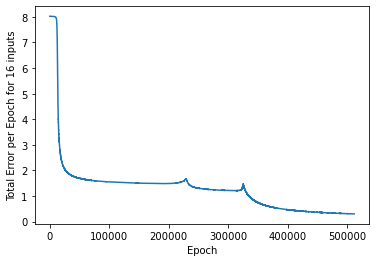

For eta value of:  0.05 the neural network converges at epoch:  511918 with final total loss per epoch for all 16 inputs is:  0.30045217965454646


In [151]:
eta = 0.05

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.027234446043186
Epoch:  10000 Loss  7.7015945640509065
Epoch:  20000 Loss  1.8952812707967899
Epoch:  30000 Loss  1.6595106662097534
Epoch:  40000 Loss  1.5776285283201938
Epoch:  50000 Loss  1.5339047045056038
Epoch:  60000 Loss  1.508601711945145
Epoch:  70000 Loss  1.490508320500433
Epoch:  80000 Loss  1.4764345018210339
Epoch:  90000 Loss  1.4662199702757568
Epoch:  100000 Loss  1.4583313298890748
Epoch:  110000 Loss  1.4513994591518178
Epoch:  120000 Loss  1.4455424263161833
Epoch:  130000 Loss  1.4399232969633988
Epoch:  140000 Loss  1.4365204332811925
Epoch:  150000 Loss  1.4325504798129913
Epoch:  160000 Loss  1.4290068236384288
Epoch:  170000 Loss  1.4260142924900059
Epoch:  180000 Loss  1.423249922643278
Epoch:  190000 Loss  1.4211276431233149
Epoch:  200000 Loss  1.418954107469431
Epoch:  210000 Loss  1.4165100943340987
Epoch:  220000 Loss  1.4149393691945735
Epoch:  230000 Loss  1.4138344623135326
Epoch:  240000 Loss  1.413502704272726
Epoch:  250000 Loss 

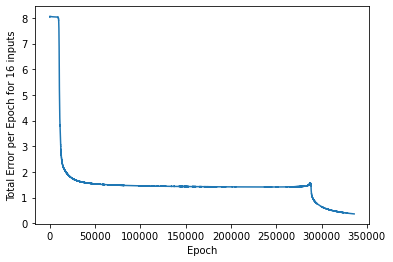

For eta value of:  0.1 the neural network converges at epoch:  335994 with final total loss per epoch for all 16 inputs is:  0.36527088136147745


In [77]:
eta = 0.1

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.055528053478513
Epoch:  10000 Loss  8.039296640926091
Epoch:  20000 Loss  2.109201389221398
Epoch:  30000 Loss  1.8363215097920405
Epoch:  40000 Loss  1.7732526452485624
Epoch:  50000 Loss  1.742376029223049
Epoch:  60000 Loss  1.723336985221843
Epoch:  70000 Loss  1.7101466099462643
Epoch:  80000 Loss  1.7003388828897632
Epoch:  90000 Loss  1.6926931583841347
Epoch:  100000 Loss  1.6865300902486575
Epoch:  110000 Loss  1.6814404458020717
Epoch:  120000 Loss  1.6771650089355328
Epoch:  130000 Loss  1.6735378439915558
Epoch:  140000 Loss  1.6704599726633238
Epoch:  150000 Loss  1.6678974588998485
Epoch:  160000 Loss  1.6659149412343148
Epoch:  170000 Loss  1.6648194496477284
Epoch:  180000 Loss  1.6658063019758358
Epoch:  190000 Loss  1.6747603447824622
Epoch:  200000 Loss  1.718935039407445
Epoch:  210000 Loss  1.0729673042478112
Epoch:  220000 Loss  0.641352082185866
Epoch:  230000 Loss  0.497543090439449
Epoch:  240000 Loss  0.4199992275539798


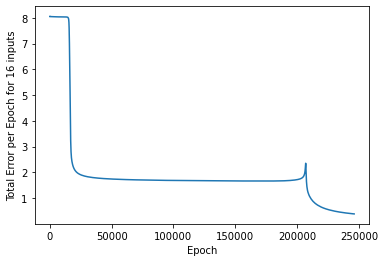

For eta value of:  0.15 the neural network converges at epoch:  246072 with final total loss per epoch for all 16 inputs is:  0.38737482838326


In [26]:
eta = 0.15

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.080467091502639
Epoch:  10000 Loss  1.8373360613228407
Epoch:  20000 Loss  1.7418149379296795
Epoch:  30000 Loss  1.7091276644851783
Epoch:  40000 Loss  1.6912141128561728
Epoch:  50000 Loss  1.6799678171849097
Epoch:  60000 Loss  1.6801233530532156
Epoch:  70000 Loss  0.6760858076635763
Epoch:  80000 Loss  0.4366577904405741
Epoch:  90000 Loss  0.3445946055417732
Epoch:  100000 Loss  0.29294542156509673


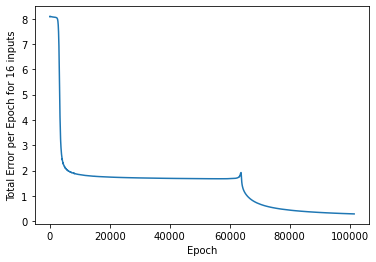

For eta value of:  0.2 the neural network converges at epoch:  101495 with final total loss per epoch for all 16 inputs is:  0.2870259052418529


In [79]:
eta = 0.20

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.08998347944544
Epoch:  10000 Loss  1.8392716952170107
Epoch:  20000 Loss  1.746763150825802
Epoch:  30000 Loss  1.71385592289377
Epoch:  40000 Loss  1.6958171670961808
Epoch:  50000 Loss  1.684080027577716
Epoch:  60000 Loss  1.6756968182037435
Epoch:  70000 Loss  1.6693611645064128
Epoch:  80000 Loss  1.6644156829736945
Epoch:  90000 Loss  1.6605469750393589
Epoch:  100000 Loss  1.6577823328753536
Epoch:  110000 Loss  1.6572619242668856
Epoch:  120000 Loss  1.671996656227837
Epoch:  130000 Loss  1.2803866570484899
Epoch:  140000 Loss  0.5533382977902053
Epoch:  150000 Loss  0.407998351861428


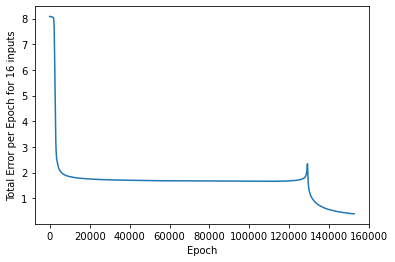

For eta value of:  0.25 the neural network converges at epoch:  152529 with final total loss per epoch for all 16 inputs is:  0.3860810421048251


In [16]:
eta = 0.25

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.125708542997817
Epoch:  10000 Loss  1.561735018053471
Epoch:  20000 Loss  1.48746739292217
Epoch:  30000 Loss  1.4580247769585615
Epoch:  40000 Loss  1.4409692559812108
Epoch:  50000 Loss  1.4297063770720049
Epoch:  60000 Loss  1.4216686453021992
Epoch:  70000 Loss  1.415143216152388
Epoch:  80000 Loss  1.410270940995515
Epoch:  90000 Loss  1.4065362254963323
Epoch:  100000 Loss  1.4029551421453852
Epoch:  110000 Loss  1.4002990732784164
Epoch:  120000 Loss  1.3983877798214073
Epoch:  130000 Loss  1.3977727738693326
Epoch:  140000 Loss  1.398695010107434
Epoch:  150000 Loss  1.4026369096561633
Epoch:  160000 Loss  1.4294585794693784


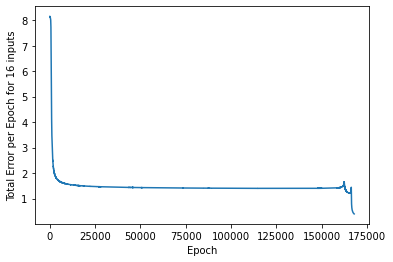

For eta value of:  0.3 the neural network converges at epoch:  167953 with final total loss per epoch for all 16 inputs is:  0.39612195386889


In [82]:
eta = 0.30

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.157883945234067
Epoch:  10000 Loss  1.7497448458508258
Epoch:  20000 Loss  1.6963741276659288
Epoch:  30000 Loss  1.6757659243027185
Epoch:  40000 Loss  1.6637899396172577
Epoch:  50000 Loss  1.6639211007750632
Epoch:  60000 Loss  0.48167370366120643
Epoch:  70000 Loss  0.316845828452916


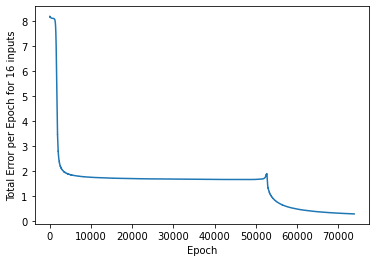

For eta value of:  0.35 the neural network converges at epoch:  73904 with final total loss per epoch for all 16 inputs is:  0.286231366694647


In [84]:
eta = 0.35

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.219821627855897
Epoch:  10000 Loss  1.9534430125050048
Epoch:  20000 Loss  1.7384179353084255
Epoch:  30000 Loss  1.7008733059165562
Epoch:  40000 Loss  1.6837870966759898


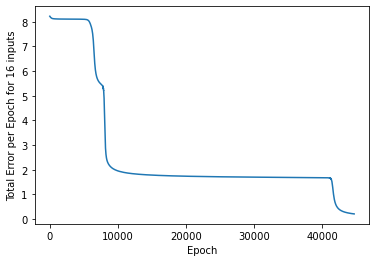

For eta value of:  0.4 the neural network converges at epoch:  44671 with final total loss per epoch for all 16 inputs is:  0.21106379743928166


In [85]:
eta = 0.40

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.094299164758672
Epoch:  10000 Loss  1.72757143831857
Epoch:  20000 Loss  1.6832803049100868
Epoch:  30000 Loss  1.666050308665919
Epoch:  40000 Loss  1.6560392496571053
Epoch:  50000 Loss  1.64949285475566
Epoch:  60000 Loss  1.6448083540634104
Epoch:  70000 Loss  1.642248027990206
Epoch:  80000 Loss  1.6691129061391565
Epoch:  90000 Loss  0.4432450448948529


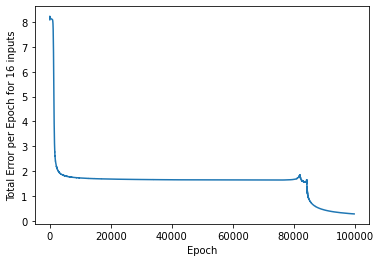

For eta value of:  0.45 the neural network converges at epoch:  99833 with final total loss per epoch for all 16 inputs is:  0.28206623545540915


In [86]:
eta = 0.45

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch:  0 Loss  8.212544873684154
Epoch:  10000 Loss  1.8046204859414419
Epoch:  20000 Loss  1.7115385214990328
Epoch:  30000 Loss  0.4692812942662584


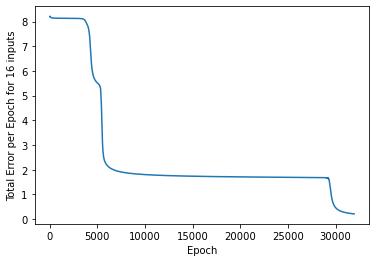

For eta value of:  0.5 the neural network converges at epoch:  31954 with final total loss per epoch for all 16 inputs is:  0.21333243996892426


In [42]:
eta = 0.5

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta)
print("For eta value of: ",eta,"the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

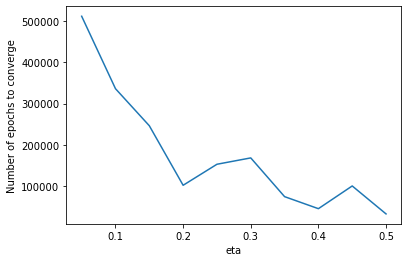

In [18]:
number_of_epochs=[511918,335994,246072,101495,152529,167953,73904,44671,99833,31954]
eta_list=[0.05,0.10,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
plt.plot(eta_list,number_of_epochs)
plt.ylabel('Number of epochs to converge')
plt.xlabel('eta')
plt.show()

Effect of eta value on convergence:

The above plot helps us 

Initially we begin with eta(learning rate) as 0.05 which is very slow learning rate. So it can be observed that the number of epochs are very high:511918 before convergence for eta=0.05.

As we increase eta to 0.1, it is expected that the number of epochs to reach convergence will reduce, so it does follow the trend, the number of epochs are 335994.

As the eta value increases further, the number of epochs reduce further, 246072 for eta=1.5, a slight increase for eta=2.0 with 101495.

However of eta equals 0.25 and 0.30, the number of epochs increase to 152529 and 167953 respectively. This may occur because we are trying to achieve error value of less 0.05 for each input. If we look at the error values at every 10000th epoch, we can see that we reach 1.80 early for higher learning rates, but it oscillates a lot to converge. It also reduces very slowly to reach its convergence. Such ups and downs may occur due to randomized initial weights and randomized selection for stochastic input.

From eta equals 0.35, the number of epochs reduces again to 73904, and further below to 44671 for eta equals 4.0.

Then as the eta increases to 0.45, it increases slighlty due to the random and stochastic nature of the model and reduces further when eta value is 0.5.

Include a momentum term in the weight update with α = 0.9 and report its effect on the
speed of training for each value of η.

In [20]:
def back_propagation_with_alpha(x,Y,actual_output,hidden_layer_weights_bias,output_layer_weights_bias,eta,delta_w,alpha):
    
    delta_k = Y[1]*(1-Y[1])*(actual_output-Y[1])
    
    delta_w[1] = eta*delta_k.T*np.insert(Y[0],0,1,axis=0)+(alpha*delta_w[1])
    
    delta_j = Y[0]*(1-Y[0])*output_layer_weights_bias[1:,:]*delta_k
    
    delta_w[0] = eta*delta_j.T*x+(alpha*delta_w[0])

    hidden_layer_weights_bias += delta_w[0]
    output_layer_weights_bias += delta_w[1]

The alpha value is used for momentum update and can increase the speed of the neural network convergence drastically. We update the value of delta_w[1] by multiplying itself with alpha(0.9) and adding it the product of eta and transpose of delta_k.

Similarly for delta_w[0], we multiply itself by alpha(0.9) and add it to the product of eta and transpose of delta_j.

In [21]:
def four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias,eta,alpha):
    epoch = 0
    delta_w = [np.zeros((5, 4))] + [np.zeros((5, 1))]
    error = []
    
    while True:
        isError = True
        stochastic_input = np.random.permutation(input_list_without_bias)
        stochastic_input=stochastic_input.tolist()
        stochastic_input.insert(0,[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
        stochastic_input=np.asarray(stochastic_input)
        error_list=[]
        total_error_per_epoch=0
        
        for i in range(0,16):
            x = stochastic_input[:,i].reshape(5,1)
            Y = forward_propagation(x,hidden_layer_weights_bias,output_layer_weights_bias)
            back_propagation_with_alpha(x, Y, np.reshape(output_list[:, i], (1, 1)), hidden_layer_weights_bias,output_layer_weights_bias, eta, delta_w,alpha)
            er = np.abs(np.squeeze(output_list[:,i]-Y[1]))
            total_error_per_epoch+=er
            if er <= 0.05:
                isError = False
                error_list.append(False)
            elif er>0.05:
                isError = True
                error_list.append(True)
        error.append(total_error_per_epoch)
        if epoch % 10000 == 0:
            print('Epoch:', epoch,' Total Loss per epoch for all 16 inputs:',total_error_per_epoch)
        epoch += 1
        if True not in error_list:
            break
    plt.plot(np.array(error))
    plt.xlabel('Epoch')
    plt.ylabel('Total Error per Epoch for 16 inputs')
    plt.show()
    return epoch,total_error_per_epoch

This operation is very similar to the initial one, except that we call the back_propagation_with_alpha here inside.

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.0228779300685
Epoch: 10000  Total Loss per epoch for all 16 inputs: 1.270667981998456
Epoch: 20000  Total Loss per epoch for all 16 inputs: 1.1692952875630365
Epoch: 30000  Total Loss per epoch for all 16 inputs: 1.1342837191516821
Epoch: 40000  Total Loss per epoch for all 16 inputs: 1.1152894246845846
Epoch: 50000  Total Loss per epoch for all 16 inputs: 1.1017327405288384
Epoch: 60000  Total Loss per epoch for all 16 inputs: 1.0908498760951626
Epoch: 70000  Total Loss per epoch for all 16 inputs: 1.0835629919879457
Epoch: 80000  Total Loss per epoch for all 16 inputs: 1.0746044725786905
Epoch: 90000  Total Loss per epoch for all 16 inputs: 1.0731280633874785
Epoch: 100000  Total Loss per epoch for all 16 inputs: 1.0659810331379154
Epoch: 110000  Total Loss per epoch for all 16 inputs: 1.062648566398944
Epoch: 120000  Total Loss per epoch for all 16 inputs: 1.0610560987849018
Epoch: 130000  Total Loss per epoch for all 16 inputs: 1.

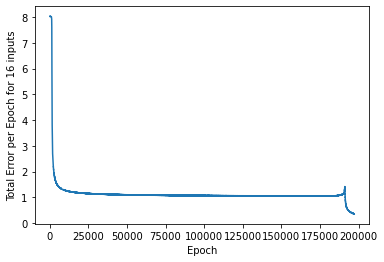

For eta value of:  0.05 with 0.9 momentum, the neural network converges at epoch:  197164 with final total loss per epoch for all 16 inputs is:  0.3592420101867442


In [55]:
eta = 0.05
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.031756377390112
Epoch: 10000  Total Loss per epoch for all 16 inputs: 1.689540758354987
Epoch: 20000  Total Loss per epoch for all 16 inputs: 1.6479111073606947
Epoch: 30000  Total Loss per epoch for all 16 inputs: 1.640869387351696
Epoch: 40000  Total Loss per epoch for all 16 inputs: 1.6395407485201479
Epoch: 50000  Total Loss per epoch for all 16 inputs: 1.6312738361077148
Epoch: 60000  Total Loss per epoch for all 16 inputs: 1.6321070892349316
Epoch: 70000  Total Loss per epoch for all 16 inputs: 1.6412621425361247
Epoch: 80000  Total Loss per epoch for all 16 inputs: 0.5714736281673679


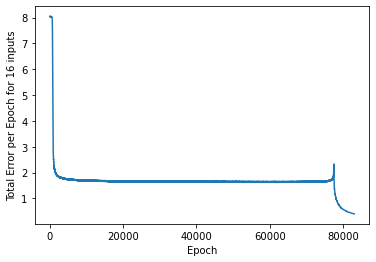

For eta value of:  0.1 with 0.9 momentum, the neural network converges at epoch:  83003 with final total loss per epoch for all 16 inputs is:  0.3982514802564187


In [57]:
eta = 0.1
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.089473100380715
Epoch: 10000  Total Loss per epoch for all 16 inputs: 1.699752024689209
Epoch: 20000  Total Loss per epoch for all 16 inputs: 1.672665170256097


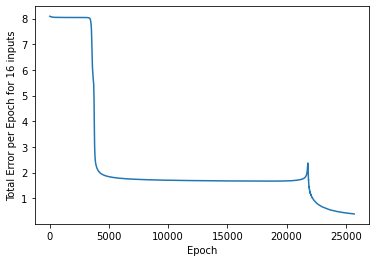

For eta value of:  0.15 with 0.9 momentum, the neural network converges at epoch:  25709 with final total loss per epoch for all 16 inputs is:  0.38735537380875157


In [65]:
eta = 0.15
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.07935144609439
Epoch: 10000  Total Loss per epoch for all 16 inputs: 1.6760454961949525


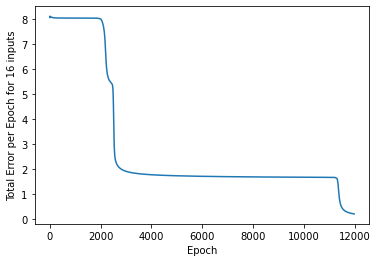

For eta value of:  0.2 with 0.9 momentum, the neural network converges at epoch:  11985 with final total loss per epoch for all 16 inputs is:  0.20618091213426845


In [60]:
eta = 0.2
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.1288778255963
Epoch: 10000  Total Loss per epoch for all 16 inputs: 1.6592787340033794


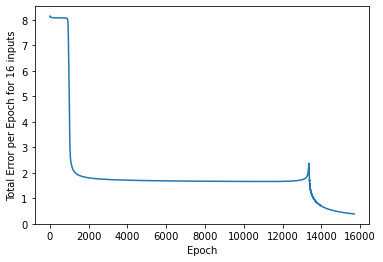

For eta value of:  0.25 with 0.9 momentum, the neural network converges at epoch:  15686 with final total loss per epoch for all 16 inputs is:  0.38650316773471777


In [64]:
eta = 0.25
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.164231293814714
Epoch: 10000  Total Loss per epoch for all 16 inputs: 1.6322031479187245


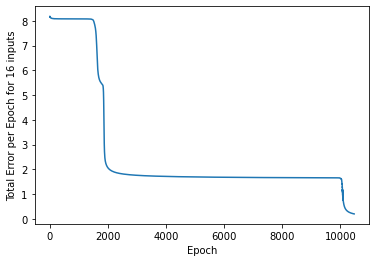

For eta value of:  0.3 with 0.9 momentum, the neural network converges at epoch:  10473 with final total loss per epoch for all 16 inputs is:  0.20148697879846325


In [63]:
eta = 0.3
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.249600232590996


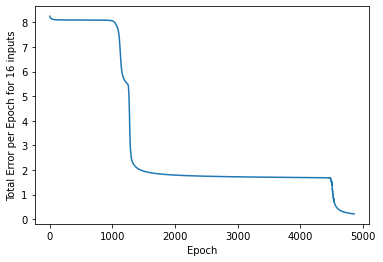

For eta value of:  0.35 with 0.9 momentum, the neural network converges at epoch:  4858 with final total loss per epoch for all 16 inputs is:  0.21470219119907902


In [66]:
eta = 0.35
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.28965769767628


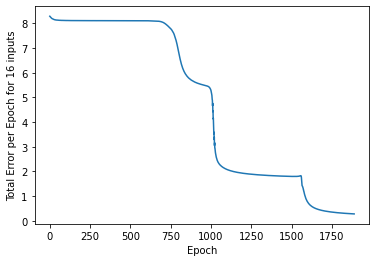

For eta value of:  0.4 with 0.9 momentum, the neural network converges at epoch:  1888 with final total loss per epoch for all 16 inputs is:  0.2759622701291825


In [22]:
eta = 0.4
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.300673996315286


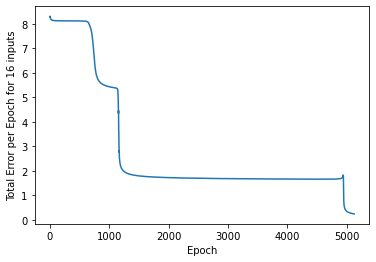

For eta value of:  0.45 with 0.9 momentum, the neural network converges at epoch:  5124 with final total loss per epoch for all 16 inputs is:  0.24165051337811083


In [69]:
eta = 0.45
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

Epoch: 0  Total Loss per epoch for all 16 inputs: 8.458416354011142


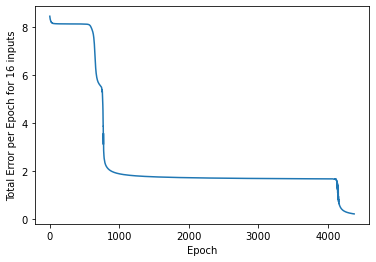

For eta value of:  0.5 with 0.9 momentum, the neural network converges at epoch:  4380 with final total loss per epoch for all 16 inputs is:  0.2067066039827654


In [154]:
eta = 0.5
momentum = 0.9

hidden_layer_weights_bias=create_hidden_layer_weights_bias()
output_layer_weights_bias=create_output_layer_weights_bias()

epoch, total_error_per_epoch = four_bit_parity_checker_with_alpha(input_list,input_list_without_bias,output_list,hidden_layer_weights_bias,output_layer_weights_bias , eta, momentum)
print("For eta value of: ",eta,"with 0.9 momentum, the neural network converges at epoch: ",epoch, "with final total loss per epoch for all 16 inputs is: ",total_error_per_epoch)

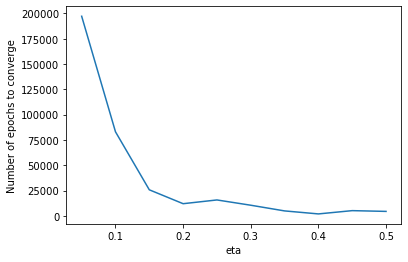

In [28]:
number_of_epochs=[197164,83003,25709,11985,15686,10473,4858,1888,5124,4380]
eta_list=[0.05,0.10,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
plt.plot(eta_list,number_of_epochs)
plt.ylabel('Number of epochs to converge')
plt.xlabel('eta')
plt.show()

The above plot helps to see number of epochs required to converge against eta values.

When we use the momentum term, our overall speed of convergence reduces. For alpha value 0.9, with eta value 0.05, it is again expected that the learning rate is less, so number of epochs for convergence is still quite high: 197164, but is much less than the value when we did not use alpha term(510000).

As we increase eta, the number of epochs for convergence reduce drastically. This time round the number of epochs reduce quite drastically and consistently. It also shows lesser oscillations this time, but it may change a bit on some occasions if the randomized weights are better.

For eta 0.10, we have 83003 epochs, eta 1.5 we have 25709 epochs, and reduces further to 1888 for eta equals 4.0. This means that the neural network learns very quickly at eta equals 0.4 with alpha value 0.9. However it increases slightly for eta value as 4.5 and 5.0 with 5124 and 4380 epochs. This can happen due to many oscillations to ensure that the error value reduces to below 0.05 for EACH input.

But it shows good approximate consistency to reduce number of epochs to converge when learning rate increases.